# Exploring the Dataset

## Balance the Dataset 

## Packages and Settings

In [11]:
import pandas as pd
# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [14]:
import os
os.getcwd()

'/Users/teresagodinho/Desktop/loan'

In [17]:
# settings to show all rows and columns
# you'll need to be extra careful to use limit/head and other commands to restrict rows
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

In [20]:
#Reading the csv file
df_main = pd.read_csv("loan.csv", low_memory=False)

In [23]:
# copying data to another variable to avoid any changes to original data
data = df_main.copy()

## Data Visualization and Information

In [28]:
#Overview of the data set
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
#Size of the data set
data.shape

(887379, 74)

In [34]:
#Information of the data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           887379 non-null  int64  
 1   member_id                    887379 non-null  int64  
 2   loan_amnt                    887379 non-null  float64
 3   funded_amnt                  887379 non-null  float64
 4   funded_amnt_inv              887379 non-null  float64
 5   term                         887379 non-null  object 
 6   int_rate                     887379 non-null  float64
 7   installment                  887379 non-null  float64
 8   grade                        887379 non-null  object 
 9   sub_grade                    887379 non-null  object 
 10  emp_title                    835917 non-null  object 
 11  emp_length                   842554 non-null  object 
 12  home_ownership               887379 non-null  object 
 13 

In [37]:
#check for null values in each variable
data.isnull().sum()

id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       51462
emp_length                      44825
home_ownership                      0
annual_inc                          4
verification_status                 0
issue_d                             0
loan_status                         0
pymnt_plan                          0
url                                 0
desc                           761353
purpose                             0
title                             153
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        29
earliest_cr_

## Initial Cleaning and Work on Variables

In [42]:
#Deleting useless columns for the analysis
df_clean = data.drop(columns=['earliest_cr_line', 'funded_amnt', 'funded_amnt_inv', 'inq_last_6mths', 'sub_grade', 'url', 'inq_fi', 'total_cu_tl', 'inq_last_12m','open_acc_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi','desc', 'zip_code', 'pub_rec', 'dti_joint', 'member_id', 'id', 'total_pymnt', 'total_rec_late_fee', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'tot_coll_amt','open_il_6m', 'total_rev_hi_lim'])

In [45]:
#Checking the size of the data set after deleting the variables
df_clean.shape

(887379, 42)

In [48]:
#Taking a look at the new data set
df_clean.head()

,loan_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,mths_since_last_delinq,mths_since_last_record,open_acc,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt_inv,total_rec_prncp,total_rec_int,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,policy_code,application_type,annual_inc_joint,verification_status_joint,acc_now_delinq,tot_cur_bal
0,5000.0,36 months,10.65,162.87,B,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,credit_card,Computer,AZ,27.65,0.0,NaN,NaN,3.0,13648.0,83.7,9.0,f,0.0,0.0,5831.78,5000.00,861.07,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,1.0,INDIVIDUAL,NaN,NaN,0.0,NaN
1,2500.0,60 months,15.27,59.83,C,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,car,bike,GA,1.00,0.0,NaN,NaN,3.0,1687.0,9.4,4.0,f,0.0,0.0,1008.71,456.46,435.17,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,1.0,INDIVIDUAL,NaN,NaN,0.0,NaN
2,2400.0,36 months,15.96,84.33,C,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,small_business,real estate business,IL,8.72,0.0,NaN,NaN,2.0,2956.0,98.5,10.0,f,0.0,0.0,3003.65,2400.00,603.65,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,1.0,INDIVIDUAL,NaN,NaN,0.0,NaN
3,10000.0,36 months,13.49,339.31,C,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,other,personel,CA,20.00,0.0,35.0,NaN,10.0,5598.0,21.0,37.0,f,0.0,0.0,12226.30,10000.00,2209.33,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,1.0,INDIVIDUAL,NaN,NaN,0.0,NaN
4,3000.0,60 months,12.69,67.79,B,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,other,Personal,OR,17.94,0.0,38.0,NaN,15.0,27783.0,53.9,38.0,f,766.9,766.9,3242.17,2233.10,1009.07,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,1.0,INDIVIDUAL,NaN,NaN,0.0,NaN


In [51]:
#Defining data frame
df = pd.DataFrame(df_clean)

In [54]:
#Updating term column to just numeric
df['duration_numeric'] = df_clean['term'].apply(lambda x: int(x.split()[0]))

In [57]:
df_clean['term'] = df_clean['term'].apply(lambda x: int(x.split()[0]))

In [60]:
#Taking a look to see if therm column updated correctly
df_clean.head()

,loan_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,mths_since_last_delinq,mths_since_last_record,open_acc,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt_inv,total_rec_prncp,total_rec_int,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,policy_code,application_type,annual_inc_joint,verification_status_joint,acc_now_delinq,tot_cur_bal
0,5000.0,36,10.65,162.87,B,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,credit_card,Computer,AZ,27.65,0.0,NaN,NaN,3.0,13648.0,83.7,9.0,f,0.0,0.0,5831.78,5000.00,861.07,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,1.0,INDIVIDUAL,NaN,NaN,0.0,NaN
1,2500.0,60,15.27,59.83,C,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,car,bike,GA,1.00,0.0,NaN,NaN,3.0,1687.0,9.4,4.0,f,0.0,0.0,1008.71,456.46,435.17,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,1.0,INDIVIDUAL,NaN,NaN,0.0,NaN
2,2400.0,36,15.96,84.33,C,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,small_business,real estate business,IL,8.72,0.0,NaN,NaN,2.0,2956.0,98.5,10.0,f,0.0,0.0,3003.65,2400.00,603.65,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,1.0,INDIVIDUAL,NaN,NaN,0.0,NaN
3,10000.0,36,13.49,339.31,C,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,other,personel,CA,20.00,0.0,35.0,NaN,10.0,5598.0,21.0,37.0,f,0.0,0.0,12226.30,10000.00,2209.33,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,1.0,INDIVIDUAL,NaN,NaN,0.0,NaN
4,3000.0,60,12.69,67.79,B,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,other,Personal,OR,17.94,0.0,38.0,NaN,15.0,27783.0,53.9,38.0,f,766.9,766.9,3242.17,2233.10,1009.07,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,1.0,INDIVIDUAL,NaN,NaN,0.0,NaN


In [63]:
#Creating dummie variables for columns Grade and Home Ownership
df_dummies = pd.get_dummies(df_clean, columns=['grade', 'home_ownership'])

In [66]:
selected_columns = ['grade_A', 'grade_B', 'grade_C','grade_D','grade_E','grade_F','grade_G','home_ownership_ANY', 'home_ownership_MORTGAGE', 'home_ownership_NONE', 'home_ownership_OTHER', 'home_ownership_OWN','home_ownership_RENT']

In [69]:
df_selected = df_dummies[selected_columns]

In [72]:
#Taking a look at the new dummie variables
df_selected.head()

,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,False,True,False,False,False,False,False,False,False,False,False,False,True
1,False,False,True,False,False,False,False,False,False,False,False,False,True
2,False,False,True,False,False,False,False,False,False,False,False,False,True
3,False,False,True,False,False,False,False,False,False,False,False,False,True
4,False,True,False,False,False,False,False,False,False,False,False,False,True


In [75]:
#Including dummie variables in the data set
df_clean=pd.concat([df_clean, df_selected], axis=1)

In [78]:
#Overview of the updated data set
df_clean.head()

,loan_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,mths_since_last_delinq,mths_since_last_record,open_acc,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt_inv,total_rec_prncp,total_rec_int,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,policy_code,application_type,annual_inc_joint,verification_status_joint,acc_now_delinq,tot_cur_bal,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,5000.0,36,10.65,162.87,B,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,credit_card,Computer,AZ,27.65,0.0,NaN,NaN,3.0,13648.0,83.7,9.0,f,0.0,0.0,5831.78,5000.00,861.07,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,1.0,INDIVIDUAL,NaN,NaN,0.0,NaN,False,True,False,False,False,False,False,False,False,False,False,False,True
1,2500.0,60,15.27,59.83,C,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,car,bike,GA,1.00,0.0,NaN,NaN,3.0,1687.0,9.4,4.0,f,0.0,0.0,1008.71,456.46,435.17,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,1.0,INDIVIDUAL,NaN,NaN,0.0,NaN,False,False,True,False,False,False,False,False,False,False,False,False,True
2,2400.0,36,15.96,84.33,C,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,small_business,real estate business,IL,8.72,0.0,NaN,NaN,2.0,2956.0,98.5,10.0,f,0.0,0.0,3003.65,2400.00,603.65,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,1.0,INDIVIDUAL,NaN,NaN,0.0,NaN,False,False,True,False,False,False,False,False,False,False,False,False,True
3,10000.0,36,13.49,339.31,C,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,other,personel,CA,20.00,0.0,35.0,NaN,10.0,5598.0,21.0,37.0,f,0.0,0.0,12226.30,10000.00,2209.33,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,1.0,INDIVIDUAL,NaN,NaN,0.0,NaN,False,False,True,False,False,False,False,False,False,False,False,False,True
4,3000.0,60,12.69,67.79,B,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,other,Personal,OR,17.94,0.0,38.0,NaN,15.0,27783.0,53.9,38.0,f,766.9,766.9,3242.17,2233.10,1009.07,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,1.0,INDIVIDUAL,NaN,NaN,0.0,NaN,False,True,False,False,False,False,False,False,False,False,False,False,True


In [81]:
#Size of the updated data set including the dummie variables
df_clean.shape

(887379, 55)

In [84]:
#Exporting the data set to a csv file
df_clean.to_csv("df_clean.csv", index=False)

# Dataset Wrangling and Balancing

## Packages and Settings

In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso
from sklearn.preprocessing import StandardScaler

In [100]:
# Load the balanced dataset
balancedb = pd.read_csv('/Users/teresagodinho/Desktop/loan/loan_b.csv', low_memory=False)

# Assuming 'loan_status' is your target variable
# Rename the target column if needed (optional step, depending on your CSV structure)
balancedb_df = pd.DataFrame(balancedb)
balancedb_df['loan_default'] = balancedb['loan_status']

# Preview the DataFrame
print(balancedb_df.head())

   loan_amnt  term  int_rate  installment grade                 emp_title emp_length home_ownership  annual_inc verification_status   issue_d pymnt_plan             purpose                    title addr_state    dti  delinq_2yrs  mths_since_last_delinq  mths_since_last_record  open_acc  revol_bal  revol_util  total_acc initial_list_status  out_prncp  out_prncp_inv  total_pymnt_inv  total_rec_prncp  total_rec_int  recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt next_pymnt_d last_credit_pull_d  policy_code application_type  annual_inc_joint verification_status_joint  acc_now_delinq  tot_cur_bal  duration_numeric  grade_A  grade_B  grade_C  grade_D  grade_E  grade_F  grade_G  home_ownership_ANY  home_ownership_MORTGAGE  home_ownership_NONE  home_ownership_OTHER  home_ownership_OWN  home_ownership_RENT  loan_status  loan_default
0    30000.0    60     12.29       671.74     C       Sr. Program Manager   < 1 year       MORTGAGE    150000.0     Source Verified  Jul-2015    

In [104]:
#Selecting just the numeric data 
numeric_data = balancedb.select_dtypes(include=['number'])

In [107]:
#Overview of the numeric data
numeric_data.head()

,loan_amnt,term,int_rate,installment,annual_inc,dti,delinq_2yrs,mths_since_last_delinq,mths_since_last_record,open_acc,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt_inv,total_rec_prncp,total_rec_int,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,annual_inc_joint,acc_now_delinq,tot_cur_bal,duration_numeric,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,loan_status
0,30000.0,60,12.29,671.74,150000.0,15.25,0.0,32.0,NaN,11.0,43721.0,75.1,21.0,28139.84,28139.84,3338.22,1860.16,1478.06,0.0,0.0,671.74,1.0,NaN,0.0,336008.0,60,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1,35000.0,36,7.89,1095.00,165000.0,17.64,0.0,NaN,NaN,20.0,40337.0,35.8,52.0,30618.38,30618.38,5459.66,4381.62,1078.04,0.0,0.0,1095.00,1.0,NaN,0.0,416595.0,36,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,27000.0,36,10.99,883.82,60000.0,21.80,0.0,36.0,NaN,9.0,61295.0,78.0,25.0,25072.82,25072.82,2634.98,1927.18,707.80,0.0,0.0,883.82,1.0,NaN,0.0,299303.0,36,0,1,0,0,0,0,0,0,1,0,0,0,0,0
3,22000.0,36,11.53,725.79,60000.0,21.68,0.0,NaN,NaN,14.0,21507.0,53.1,28.0,17188.36,17188.36,6503.93,4811.64,1692.29,0.0,0.0,725.79,1.0,NaN,0.0,89101.0,36,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4,9750.0,36,12.99,328.47,400000.0,0.50,1.0,13.0,NaN,4.0,8138.0,66.2,21.0,4801.77,4801.77,6569.40,4948.23,1621.17,0.0,0.0,328.47,1.0,NaN,0.0,220138.0,36,0,1,0,0,0,0,0,0,0,0,0,1,0,0


## Filtering

In [114]:
#Choosing the variables we want to include in the new data set
selected_columns = ['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'delinq_2yrs', 'grade_A', 'grade_B', 'grade_C', 'grade_D', 'grade_E', 'grade_F', 'grade_G', 'home_ownership_ANY', 'home_ownership_MORTGAGE', 'home_ownership_NONE', 'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT', 'open_acc', 'loan_status']  # replace with your column names
short_df = numeric_data[selected_columns]

In [117]:
#Overview of the new data set
short_df.head()

,loan_amnt,term,int_rate,installment,annual_inc,delinq_2yrs,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,open_acc,loan_status
0,30000.0,60,12.29,671.74,150000.0,0.0,0,0,1,0,0,0,0,0,1,0,0,0,0,11.0,0
1,35000.0,36,7.89,1095.00,165000.0,0.0,1,0,0,0,0,0,0,0,1,0,0,0,0,20.0,0
2,27000.0,36,10.99,883.82,60000.0,0.0,0,1,0,0,0,0,0,0,1,0,0,0,0,9.0,0
3,22000.0,36,11.53,725.79,60000.0,0.0,0,1,0,0,0,0,0,0,1,0,0,0,0,14.0,0
4,9750.0,36,12.99,328.47,400000.0,1.0,0,1,0,0,0,0,0,0,0,0,0,1,0,4.0,0


In [120]:
#Size of the new data set
short_df.shape

(4063, 21)

In [123]:
# Check for missing values in the new data set
missing_values = short_df.isna().sum()
print('Missing values per column:')
print(missing_values)

Missing values per column:
loan_amnt                  0
term                       0
int_rate                   0
installment                0
annual_inc                 0
delinq_2yrs                0
grade_A                    0
grade_B                    0
grade_C                    0
grade_D                    0
grade_E                    0
grade_F                    0
grade_G                    0
home_ownership_ANY         0
home_ownership_MORTGAGE    0
home_ownership_NONE        0
home_ownership_OTHER       0
home_ownership_OWN         0
home_ownership_RENT        0
open_acc                   0
loan_status                0
dtype: int64


In [126]:
#Export to csv file
short_df.to_csv("short_df.csv", index=False)

## Balance the Dataset

In [ ]:
# Load your dataset
import os
os.getcwd()

In [6]:
import pandas as pd

In [8]:
# Load the dataset
df_short = pd.read_csv("short_df.csv", low_memory=False)

In [10]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [16]:
X = df_short.drop(['loan_status'], axis=1)
y = df_short['loan_status']

In [18]:
y.value_counts()

loan_status
0    2844
1    1219
Name: count, dtype: int64

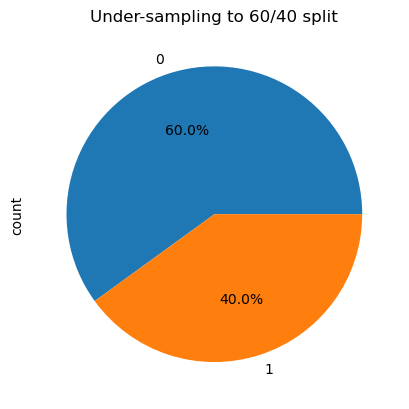

In [20]:
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt

# Create the undersampler object with the desired strategy for 60/40 balance
rus = RandomUnderSampler(sampling_strategy=0.6667, random_state=42)

# Fit and apply the undersampling
X_res, y_res = rus.fit_resample(X, y)

# Plot the distribution of the resampled dataset
ax = y_res.value_counts().plot.pie(autopct='%1.1f%%')
ax.set_title("Under-sampling to 60/40 split")
plt.show()

In [22]:
# Display class distribution
y_res.value_counts()

loan_status
0    1828
1    1219
Name: count, dtype: int64

In [24]:
# Combine the resampled features and target into a single DataFrame
df_resampled = pd.DataFrame(X_res, columns=X.columns)
df_resampled['loan_status'] = y_res

# Save the resampled DataFrame to a CSV file
df_resampled.to_csv('/Users/teresagodinho/Desktop/loan/loan_balanced_6040.csv', index=False)

print("Resampled dataset saved successfully.")

Resampled dataset saved successfully.


# Models

## Logistic Regression

Confusion Matrix:
 [[824  43]
 [296  56]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.95      0.83       867
           1       0.57      0.16      0.25       352

    accuracy                           0.72      1219
   macro avg       0.65      0.55      0.54      1219
weighted avg       0.69      0.72      0.66      1219

Accuracy Score:
 0.7219031993437244


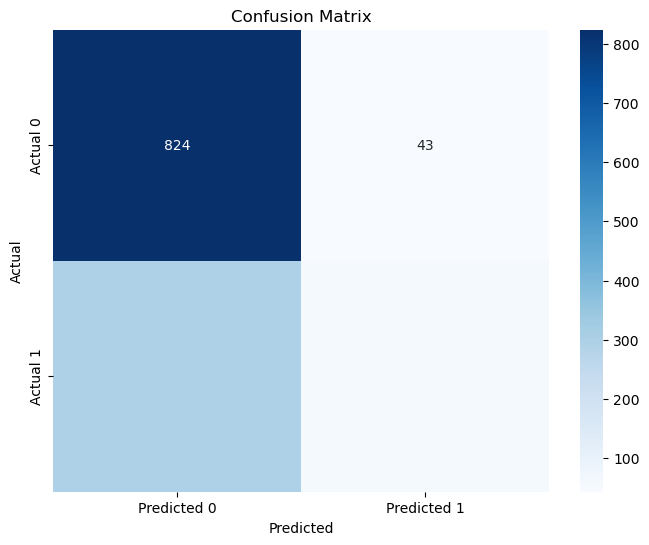

In [28]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Assuming X and y are your features and labels
# If not already done, split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the logistic regression model
log_reg = LogisticRegression(penalty='l1', solver='liblinear')
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Additional analysis: classification report and accuracy
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:\n", accuracy_score(y_test, y_pred))

# If you want to visualize the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## Logistic Regression with L1 Penalty and SMOTE

Confusion Matrix:
 [[793  74]
 [258  94]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.91      0.83       867
           1       0.56      0.27      0.36       352

    accuracy                           0.73      1219
   macro avg       0.66      0.59      0.59      1219
weighted avg       0.70      0.73      0.69      1219

Accuracy Score:
 0.7276456111566858


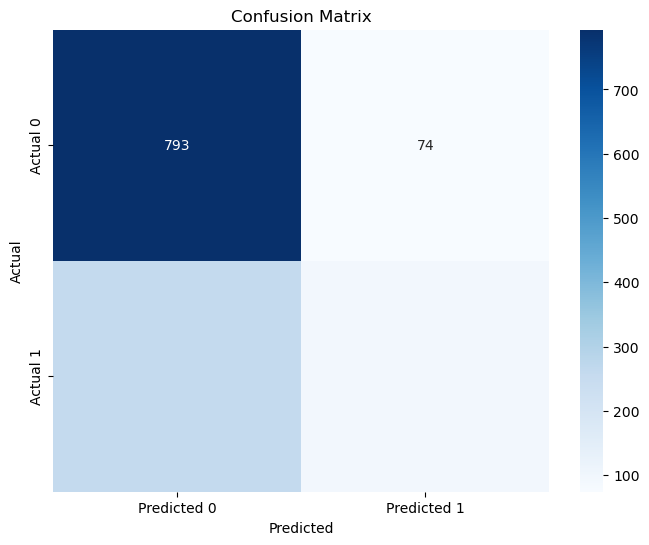

In [26]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Assuming X and y are your features and labels
# If not already done, split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Fit the logistic regression model with L1 penalty on resampled data
log_reg_smote = LogisticRegression(penalty='l1', solver='liblinear')
log_reg_smote.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = log_reg_smote.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Additional analysis: classification report and accuracy
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:\n", accuracy_score(y_test, y_pred))

# If you want to visualize the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [30]:
# Display coefficients
coefficients = pd.Series(log_reg.coef_[0], index=df_short.columns[:-1])
print("L1 Penalty Coefficients:\n", coefficients)


L1 Penalty Coefficients:
 loan_amnt                  0.000001
term                      -0.000843
int_rate                   0.127026
installment                0.000025
annual_inc                -0.000004
delinq_2yrs                0.080481
grade_A                   -0.570295
grade_B                    0.000000
grade_C                    0.056532
grade_D                    0.060721
grade_E                    0.000000
grade_F                   -0.443978
grade_G                    0.000000
home_ownership_ANY         0.000000
home_ownership_MORTGAGE   -0.494620
home_ownership_NONE        0.000000
home_ownership_OTHER       0.000000
home_ownership_OWN        -0.839700
home_ownership_RENT       -0.248605
open_acc                   0.025838
dtype: float64


In [32]:
# Non-zero coefficients
non_zero_coefficients = coefficients[coefficients != 0]
print("Non-zero Coefficients:\n", non_zero_coefficients)

Non-zero Coefficients:
 loan_amnt                  0.000001
term                      -0.000843
int_rate                   0.127026
installment                0.000025
annual_inc                -0.000004
delinq_2yrs                0.080481
grade_A                   -0.570295
grade_C                    0.056532
grade_D                    0.060721
grade_F                   -0.443978
home_ownership_MORTGAGE   -0.494620
home_ownership_OWN        -0.839700
home_ownership_RENT       -0.248605
open_acc                   0.025838
dtype: float64


## Random Forest

Confusion Matrix:
 [[762 105]
 [252 100]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.88      0.81       867
           1       0.49      0.28      0.36       352

    accuracy                           0.71      1219
   macro avg       0.62      0.58      0.58      1219
weighted avg       0.68      0.71      0.68      1219

Accuracy Score:
 0.7071369975389664


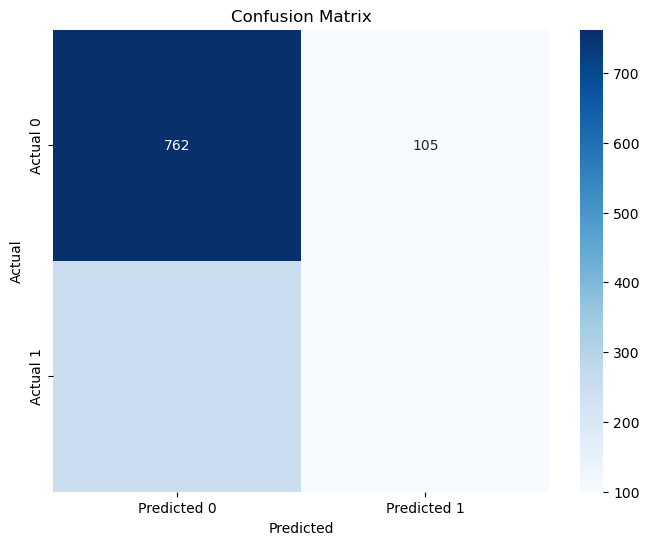

In [36]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Assuming X and y are your features and labels
# If not already done, split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the Random Forest classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred = rf_clf.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Additional analysis: classification report and accuracy
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:\n", accuracy_score(y_test, y_pred))

# If you want to visualize the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Random Forest Using SMOTE

Confusion Matrix:
 [[715 152]
 [226 126]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.82      0.79       867
           1       0.45      0.36      0.40       352

    accuracy                           0.69      1219
   macro avg       0.61      0.59      0.60      1219
weighted avg       0.67      0.69      0.68      1219

Accuracy Score:
 0.689909762100082


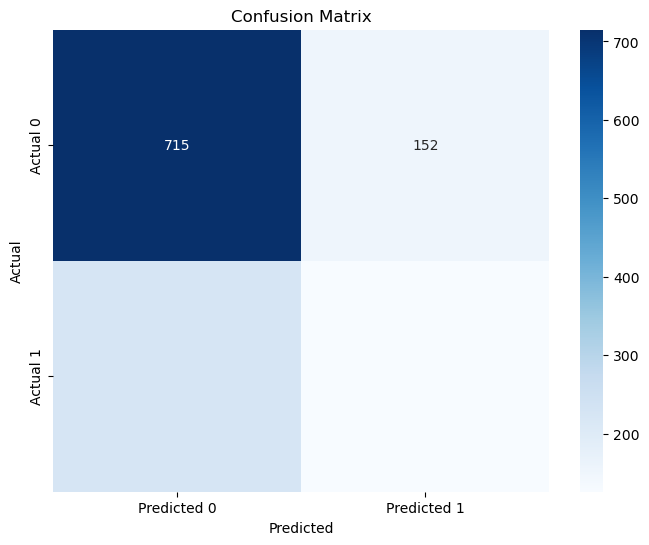

In [38]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Assuming X and y are your features and labels
# If not already done, split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Fit the Random Forest classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = rf_clf.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Additional analysis: classification report and accuracy
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:\n", accuracy_score(y_test, y_pred))

# If you want to visualize the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Random Forest Using SMOTE and GridSearch CV

In [68]:
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

In [70]:
# Create the pipeline
pipeline = make_pipeline(
    SMOTE(random_state=42),
    RandomForestClassifier(class_weight='balanced', random_state=42)
)

In [72]:
# Define the parameter grid
param_grid = {
    'randomforestclassifier__n_estimators': [100, 200, 300],
    'randomforestclassifier__max_depth': [None, 10, 20, 30],
    'randomforestclassifier__min_samples_split': [2, 5, 10],
    'randomforestclassifier__min_samples_leaf': [1, 2, 4]
}

In [74]:
# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='recall', n_jobs=-1, verbose=2)


In [76]:
# Fit the model
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': [None, 10, 20,
                                                               30],
                         'randomforestclassifier__min_samples_leaf': [1, 2, 4],
                         'randomforestclassifier__min_samples_split': [2, 5,
                                                                       10],
                         'randomforestclassifier__n_estimators': [100, 200,
                                                                  300]},
             scoring='recall', verbose=2)

In [80]:
# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

Best parameters found:  {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__min_samples_leaf': 2, 'randomforestclassifier__min_samples_split': 10, 'randomforestclassifier__n_estimators': 100}


In [82]:
# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print("Accuracy with Best Model:", accuracy_score(y_test, y_pred_best))
print("Classification Report with Best Model:\n", classification_report(y_test, y_pred_best))

Accuracy with Best Model: 0.6285362853628537
Classification Report with Best Model:
               precision    recall  f1-score   support

           0       0.80      0.64      0.71       580
           1       0.40      0.60      0.48       233

    accuracy                           0.63       813
   macro avg       0.60      0.62      0.60       813
weighted avg       0.69      0.63      0.64       813



  # Linear Regression VS Random Forest Regressor for Interest Rate Suggestion #

The suggested interest rate using Linear Regression is 14.35%
The suggested interest rate using Random Forest Regressor is 17.66%
Linear Regression - Mean Squared Error: 17.68, R^2 Score: 0.19
Random Forest Regressor - Mean Squared Error: 20.48, R^2 Score: 0.06


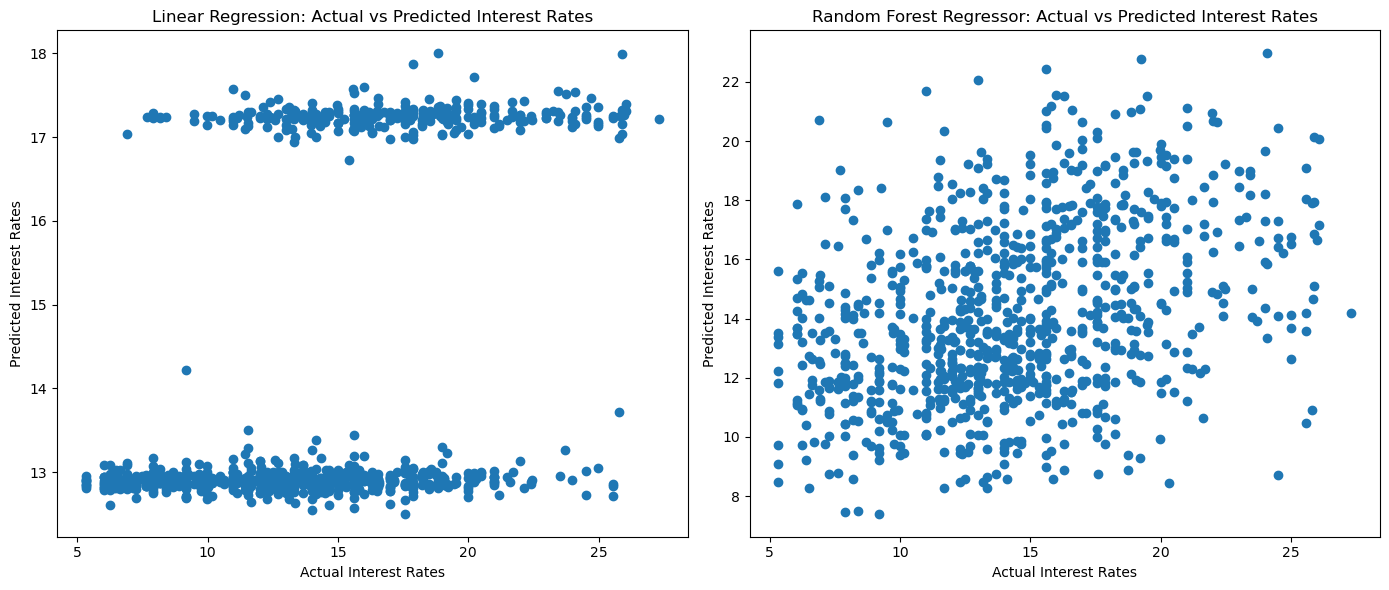

In [94]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/Users/teresagodinho/Desktop/loan/loan_balanced_6040.csv')

# Replace null with None or np.nan
data = data.replace({None: np.nan, 'null': np.nan})

# Prepare data for regression to predict interest rates
X_interest = data[['loan_amnt', 'open_acc', 'delinq_2yrs', 'term']]
y_interest = data['int_rate']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_interest, y_interest, test_size=0.3, random_state=42)

# Train a Linear Regression model
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)

# Train a Random Forest Regressor model
rf_reg_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg_model.fit(X_train, y_train)

# Function to predict the interest rate using a specified model
def predict_interest_rate(model, loan_amnt, open_acc, delinq_2yrs, term):
    input_data = pd.DataFrame({
        'loan_amnt': [loan_amnt],
        'open_acc': [open_acc],
        'delinq_2yrs': [delinq_2yrs],
        'term': [term]
    })
    predicted_rate = model.predict(input_data)
    return predicted_rate[0]

# Example usage
loan_amnt = 300000
open_acc = 5
delinq_2yrs = 0
term = 36

# Predict using Linear Regression
predicted_rate_lin_reg = predict_interest_rate(lin_reg_model, loan_amnt, open_acc, delinq_2yrs, term)
print(f"The suggested interest rate using Linear Regression is {predicted_rate_lin_reg:.2f}%")

# Predict using Random Forest Regressor
predicted_rate_rf_reg = predict_interest_rate(rf_reg_model, loan_amnt, open_acc, delinq_2yrs, term)
print(f"The suggested interest rate using Random Forest Regressor is {predicted_rate_rf_reg:.2f}%")

# Evaluate the models
y_pred_lin_reg = lin_reg_model.predict(X_test)
mse_lin_reg = mean_squared_error(y_test, y_pred_lin_reg)
r2_lin_reg = r2_score(y_test, y_pred_lin_reg)
print(f"Linear Regression - Mean Squared Error: {mse_lin_reg:.2f}, R^2 Score: {r2_lin_reg:.2f}")

y_pred_rf_reg = rf_reg_model.predict(X_test)
mse_rf_reg = mean_squared_error(y_test, y_pred_rf_reg)
r2_rf_reg = r2_score(y_test, y_pred_rf_reg)
print(f"Random Forest Regressor - Mean Squared Error: {mse_rf_reg:.2f}, R^2 Score: {r2_rf_reg:.2f}")

# Optional: Visualize the prediction results for both models
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lin_reg)
plt.xlabel("Actual Interest Rates")
plt.ylabel("Predicted Interest Rates")
plt.title("Linear Regression: Actual vs Predicted Interest Rates")

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf_reg)
plt.xlabel("Actual Interest Rates")
plt.ylabel("Predicted Interest Rates")
plt.title("Random Forest Regressor: Actual vs Predicted Interest Rates")

plt.tight_layout()
plt.show()

# Graphs

## Correlation Heatmap

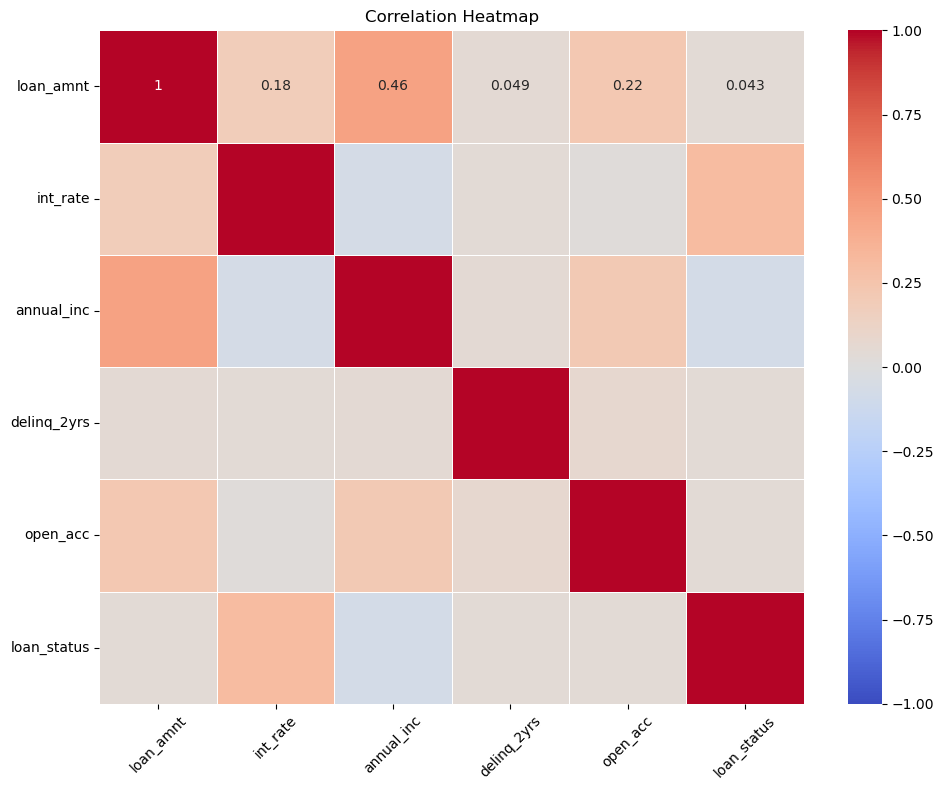

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('/Users/teresagodinho/Desktop/loan/loan_balanced_6040.csv')

# Create a mock 'loan_purpose' column for demonstration
np.random.seed(0)
df['loan_purpose'] = np.random.choice(['credit_card', 'debt_consolidation', 'home_improvement', 'small_business', 'other'], size=len(df))

# Select a subset of important numeric columns for correlation calculation
important_numeric_cols = ['loan_amnt', 'int_rate', 'annual_inc', 'delinq_2yrs', 'open_acc', 'loan_status']
correlation_matrix = df[important_numeric_cols].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1, annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Distribution of Loan Amounts

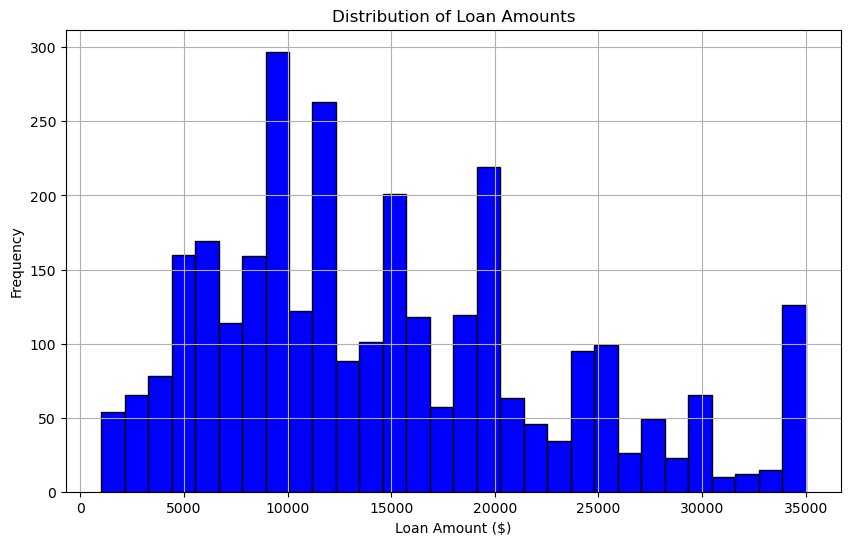

In [152]:
# Create a mock 'loan_purpose' column for demonstration
np.random.seed(0)
df['loan_purpose'] = np.random.choice(['credit_card', 'debt_consolidation', 'home_improvement', 'small_business', 'other'], size=len(df))

# 1. Distribution of Loan Amounts
plt.figure(figsize=(10, 6))
plt.hist(df['loan_amnt'], bins=30, color='blue', edgecolor='black')
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount ($)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Interest Rate Distribution

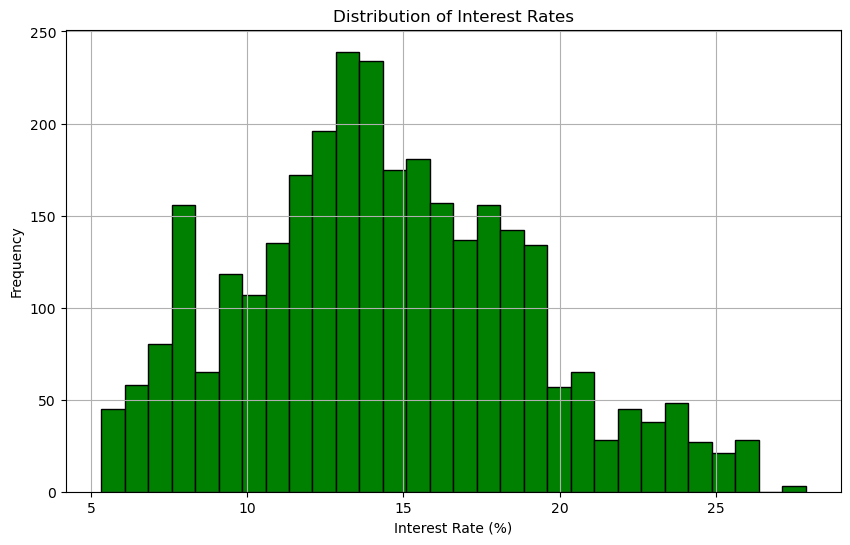

In [159]:
plt.figure(figsize=(10, 6))
plt.hist(df['int_rate'], bins=30, color='green', edgecolor='black')
plt.title('Distribution of Interest Rates')
plt.xlabel('Interest Rate (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Loan Purpose Distribution

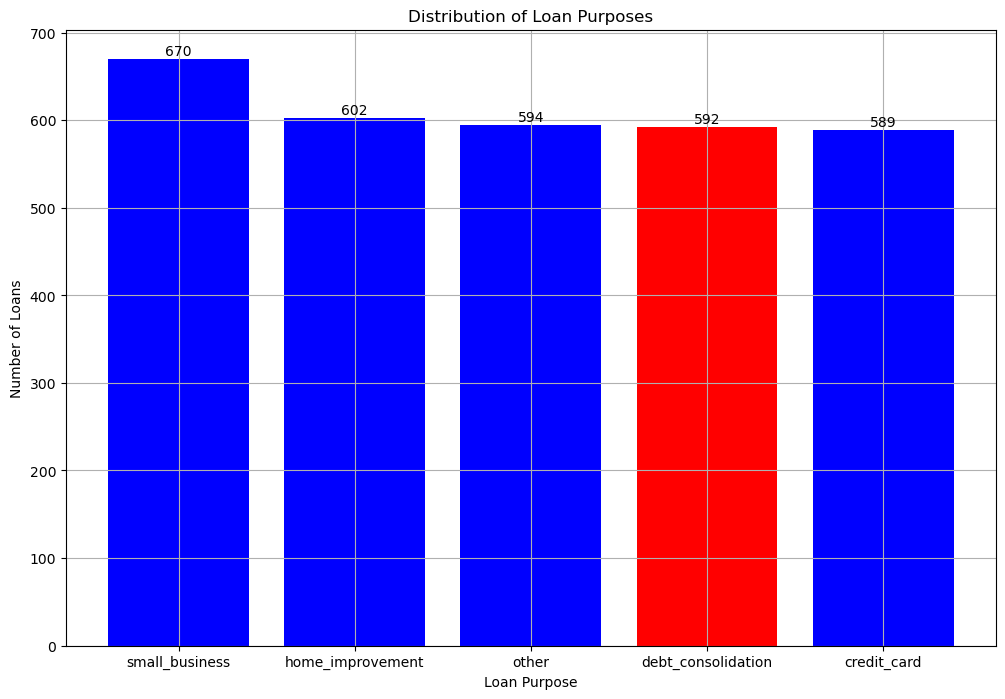

In [166]:
purpose_counts = df['loan_purpose'].value_counts()
plt.figure(figsize=(12, 8))
bars = plt.bar(purpose_counts.index, purpose_counts.values, color=['blue' if purpose != 'debt_consolidation' else 'red' for purpose in purpose_counts.index])
plt.title('Distribution of Loan Purposes')
plt.xlabel('Loan Purpose')
plt.ylabel('Number of Loans')
plt.grid(True)
# Annotate the bars with the exact number of loans
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), ha='center', va='bottom')
plt.show()

## Income Distribution

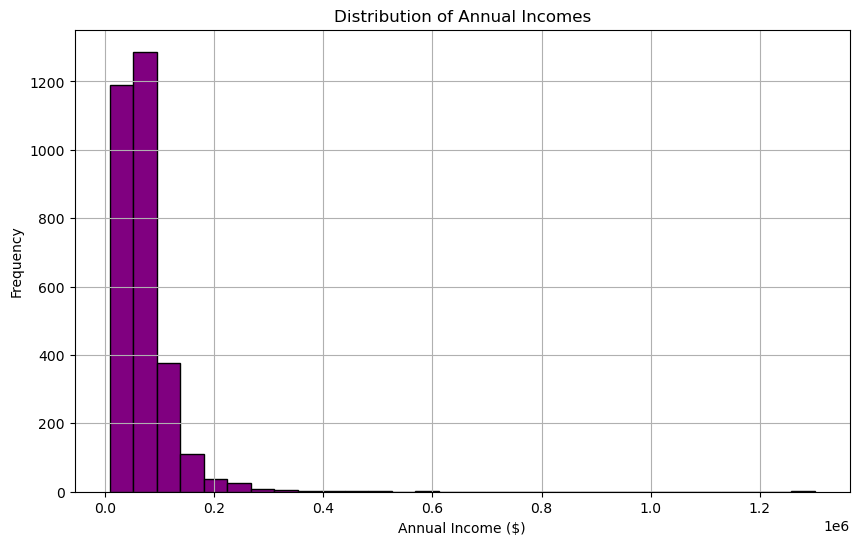

In [171]:
plt.figure(figsize=(10, 6))
plt.hist(df['annual_inc'], bins=30, color='purple', edgecolor='black')
plt.title('Distribution of Annual Incomes')
plt.xlabel('Annual Income ($)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# First Version of Dashboard

In [178]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd
# Load the dataset
df = pd.read_csv('/Users/teresagodinho/Desktop/loan/loan_balanced_6040.csv')
# Initialize the Dash app
app = dash.Dash(__name__)
app.config.suppress_callback_exceptions = True
# Define the CSS styles
styles = {
    'main': {
        'backgroundColor': '#1E90FF',  # DodgerBlue background
        'color': 'white',
        'fontFamily': 'Arial, sans-serif',
        'padding': '20px',
        'textAlign': 'center'
    },
    'link': {
        'color': 'white',
        'textDecoration': 'none',
        'margin': '10px'
    },
    'header': {
        'textAlign': 'center',
        'padding': '10px',
        'fontSize': '2em'
    },
    'dropdown': {
        'margin': '20px auto',
        'width': '50%'
    },
    'graph': {
        'margin': '20px'
    },
    'footer': {
        'textAlign': 'center',
        'padding': '10px',
        'fontSize': '0.8em',
        'color': '#D3D3D3'
    }
}
# Define the layout for the main page
main_page_layout = html.Div([
    html.H1('Loan Data Summary', style=styles['header']),
    html.P(f'Total number of loans: {df.shape[0]}'),
    html.P(f'Total amount loaned: ${df["loan_amnt"].sum():,.2f}'),
    html.P(f'Average annual income: ${df["annual_inc"].mean():,.2f}'),
    html.P(f'Average interest rate: {df["int_rate"].mean():.2f}%'),
])

# Define the layout for the graph page
graph_page_layout = html.Div([
    html.H1('Interactive Graphs', style=styles['header']),
    dcc.Dropdown(
        id='x-axis-dropdown',
        options=[{'label': col, 'value': col} for col in df.columns],
        value='loan_amnt',
        style=styles['dropdown']
    ),
    dcc.Dropdown(
        id='y-axis-dropdown',
        options=[{'label': col, 'value': col} for col in df.columns],
        value='int_rate',
        style=styles['dropdown']
    ),
    dcc.Graph(id='interactive-graph', style=styles['graph']),
])

# Define the layout for the client evaluation page
client_evaluation_layout = html.Div([
    html.H1('Client Evaluation', style=styles['header']),
    html.P('This page will be used for client evaluation.'),
])

# Define the app layout with tabs
app.layout = html.Div([
    dcc.Tabs(id='tabs', value='main-page', children=[
        dcc.Tab(label='Main Page', value='main-page'),
        dcc.Tab(label='Graphs', value='graphs'),
        dcc.Tab(label='Client Evaluation', value='client-evaluation'),
    ]),
    html.Div(id='tabs-content')
])

# Update the layout based on the selected tab
@app.callback(Output('tabs-content', 'children'),
              [Input('tabs', 'value')])
def render_content(tab):
    if tab == 'graphs':
        return graph_page_layout
    elif tab == 'client-evaluation':
        return client_evaluation_layout
    else:
        return main_page_layout

# Define the callback to update the interactive graph based on dropdown selection
@app.callback(
    Output('interactive-graph', 'figure'),
    [Input('x-axis-dropdown', 'value'), Input('y-axis-dropdown', 'value')]
)
def update_interactive_graph(x_axis, y_axis):
    fig = px.scatter(df, x=x_axis, y=y_axis, title=f'{x_axis} vs {y_axis}')
    return fig
# Run the app
if __name__ == '__main__':
    app.run_server(debug=True, port=8080)

In [182]:
pip install dash dash-bootstrap-components pandas scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [184]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [191]:
import dash
import numpy as np
from dash import dcc, html
from dash.dependencies import Input, Output, State
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from imblearn.over_sampling import SMOTE
import dash_bootstrap_components as dbc
from dash import dash_table
import plotly.express as px
import plotly.figure_factory as ff
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the dataset
data = pd.read_csv('/Users/teresagodinho/Desktop/loan/loan_balanced_6040.csv')

# Data preprocessing
X = data[['annual_inc', 'term', 'loan_amnt', 'home_ownership_OWN']]
y = data['loan_status']

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Define the Random Forest Classifier with GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [4, 6, 8, 10],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best model from GridSearchCV
model = grid_search.best_estimator_

# Prepare data for linear regression to predict interest rates
X_interest = data[['loan_amnt', 'open_acc', 'delinq_2yrs', 'term']]
y_interest = data['int_rate']

# Train a Linear Regression model for predicting interest rates
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_interest, y_interest)

# Standardize data for clustering
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['annual_inc', 'loan_amnt']])

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
data['cluster'] = kmeans.fit_predict(data_scaled)

# Compute default probabilities for each client using the Random Forest Classifier
data['probability_of_default'] = model.predict_proba(data[['annual_inc', 'term', 'loan_amnt', 'home_ownership_OWN']])[:, 1]
data.sort_values(by='probability_of_default', ascending=False, inplace=True)

# Initialize the Dash app with Bootstrap theme
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

# Define the layout of the app
app.layout = dbc.Container(
    fluid=True,
    children=[
        dbc.Row(
            dbc.Col(html.Img(src="/assets/LendSmart_logo.png", height="100px", style={"display": "block", "margin-left": "auto", "margin-right": "auto"}), width={"size": 6, "offset": 3}),
        ),
        dbc.Row(
            dbc.Col(
                dcc.Tabs(id="tabs-example", value='tab-1', children=[
                    dcc.Tab(label='Main Page', value='tab-1'),
                    dcc.Tab(label='Background Information', value='tab-2'),
                    dcc.Tab(label='New Client Default Prediction', value='tab-3'),
                    dcc.Tab(label='Client Risk Segmentation', value='tab-4'),
                ])
            )
        ),
        html.Div(id='tabs-content-example')
    ],
    style={"background-color": "#ffffff"}
)

# Define callback to render content based on selected tab
@app.callback(
    Output('tabs-content-example', 'children'),
    Input('tabs-example', 'value')
)
def render_content(tab):
    if tab == 'tab-1':
        return html.Div([
            html.Div(
                "This dashboard helps a US loan mortgage company identify and manage at-risk clients. Using machine learning models and statistical analysis, it predicts loan defaults and provides actionable insights. Amid rising US mortgage delinquency rates due to economic uncertainty (Financial Times), this tool enables early identification of potential defaults and better management of at-risk clients, ensuring financial stability and improved loan portfolio management.", 
                style={"text-align": "center", "color": "white", "padding": "20px", "border-radius": "10px", "font-size": "20px", "margin-bottom": "20px", "margin-top": "20px", "background-color": "#1B49A4"}
            ),
        ])
    elif tab == 'tab-2':
        return html.Div([
            html.Div(
                "Explore various graphs that describe our dataset, which underpins the predictive tools used in the following tabs. Gain insights into loan distributions, income levels, interest rates, and more.", 
                style={"text-align": "center", "color": "white", "padding": "20px", "border-radius": "10px", "font-size": "20px", "margin-bottom": "20px", "margin-top": "20px", "background-color": "#1B49A4"}
            ),
    
            dcc.Dropdown(
                id='dropdown-selection',
                options=[
                    {'label': 'Correlation Heatmap', 'value': 'heatmap'},
                    {'label': 'Distribution of Loan Status', 'value': 'loan_status'},
                    {'label': 'Distribution of Loan Amounts', 'value': 'loan_amounts'},
                    {'label': 'Distribution of Annual Incomes', 'value': 'annual_incomes'},
                    {'label': 'Distribution of Interest Rates', 'value': 'interest_rates'}
                ],
                value='heatmap'
            ),
            html.Div(id='display-selected-value', style={'display': 'flex', 'justify-content': 'center', 'align-items': 'center', 'margin-top': '20px'})
        ])
    elif tab == 'tab-3':
        return dbc.Container(
            fluid=True,
            children=[
                dbc.Row(
                    dbc.Col(
                        html.P("Enter your information to receive a personalized loan recommendation in seconds. Our tool quickly evaluates your eligibility, helping you save time and determine the feasibility of your loan application. If your loan is denied, you will receive a recommendation. If your loan is approved, we will suggest an interest rate.", 
                               style={"text-align": "center", "color": "white", "padding": "20px", "margin-top": "20px", "border-radius": "10px", "font-size": "20px", "margin-bottom": "20px","background-color": "#1B49A4"}),
                        width=12
                    )
                ),
                dbc.Row([
                    dbc.Col(html.Label('Annual Income', style={"color": "#2c3e50"}), width={"size": 6, "offset": 3}),
                    dbc.Col(dcc.Input(id='annual-income', type='number', value=120000, min=0, max=1000000, style={"width": "100%", "padding": "10px"}), width={"size": 6, "offset": 3})
                ]),
                dbc.Row([
                    dbc.Col(html.Label('Loan Term (months)', style={"color": "#2c3e50"}), width={"size": 6, "offset": 3}),
                    dbc.Col(dcc.Input(id='loan-term', type='number', value=36, min=1, max=360, style={"width": "100%", "padding": "10px"}), width={"size": 6, "offset": 3})
                ]),
                dbc.Row([
                    dbc.Col(html.Label('Loan Amount', style={"color": "#2c3e50"}), width={"size": 6, "offset": 3}),
                    dbc.Col(dcc.Input(id='loan-amount', type='number', value=300000, min=0, max=1000000, style={"width": "100%", "padding": "10px"}), width={"size": 6, "offset": 3})
                ]),
                dbc.Row([
                    dbc.Col(html.Label('Home Ownership (OWN=1, RENT=0)', style={"color": "#2c3e50"}), width={"size": 6, "offset": 3}),
                    dbc.Col(dcc.Input(id='home-ownership', type='number', value=1, min=0, max=1, style={"width": "100%", "padding": "10px"}), width={"size": 6, "offset": 3})
                ]),
                dbc.Row([
                    dbc.Col(html.Label('Number of Open Accounts', style={"color": "#2c3e50"}), width={"size": 6, "offset": 3}),
                    dbc.Col(dcc.Input(id='class-open-acc', type='number', value=5, min=0, max=50, style={"width": "100%", "padding": "10px"}), width={"size": 6, "offset": 3})
                ]),
                dbc.Row([
                    dbc.Col(html.Label('Delinquencies in Last 2 Years 1=YES 0=NO', style={"color": "#2c3e50"}), width={"size": 6, "offset": 3}),
                    dbc.Col(dcc.Input(id='class-delinq-2yrs', type='number', value=0, min=0, max=50, style={"width": "100%", "padding": "10px"}), width={"size": 6, "offset": 3})
                ]),
                dbc.Row(
                    dbc.Col(
                        html.Button('Predict', id='predict-button', n_clicks=0, style={"background-color": "#1B49A4", "color": "white", "padding": "20px 25px", "border-radius": "20px", "font-size": "20px"}),
                        width={"size": 6, "offset": 3},
                        style={"padding-top": "20px","display": "flex"}
                    ),
                    justify="start"
                ),
                dbc.Row(
                    dbc.Col(
                        html.Div(
                            [
                                html.H3('Prediction', style={"color": "white"}),
                                html.Div(id='prediction-result', style={"color": "white"}),
                                html.H3('Prediction Probability', style={"color": "white"}),
                                html.Div(id='prediction-probability', style={"color": "white"}),
                                html.H3(id='recommendations-title', style={"color": "white"}),
                                html.Div(id='recommendations', style={"color": "white"})
                            ],
                            style={"padding": "20px", "backgroundColor": "#1B49A4", "borderRadius": "10px", "margin-top": "20px"}  # Adding top margin to space out results}
                        ),
                        width=6, style={"padding": "10px"}
                    ),
                    justify="center"
                )
            ]
        )
    elif tab == 'tab-4':
        risk_levels = data.pivot_table(values='loan_status', 
                                       index=pd.cut(data['loan_amnt'], bins=range(0, 105000, 5000)), 
                                       columns=pd.cut(data['annual_inc'], bins=range(0, 1050000, 50000)), 
                                       aggfunc='mean')
        risk_levels = risk_levels.fillna(0)  # fill NaNs with zeros

        x_labels = [f"${i*5000}" for i in range(21)]  # generate loan amount bins labels
        y_labels = [f"${i*50000}" for i in range(21)]  # generate annual income bins labels

        heatmap = px.imshow(
            risk_levels.values,
            labels=dict(x="Loan Amount", y="Annual Income", color="Default Probability"),
            x=x_labels[:risk_levels.shape[1]],
            y=y_labels[:risk_levels.shape[0]],
            color_continuous_scale='RdYlGn_r',
        )

        heatmap.update_layout(
            title='Client Risk Segmentation Heatmap',
            xaxis_title='Loan Amount',
            yaxis_title='Annual Income',
            autosize=False,
            width=800,
            height=800
        )
        
        datatable = dash_table.DataTable(
            id='client-table',
            columns=[
                {"name": "Client", "id": "client"},
                {"name": "Annual Income", "id": "annual_inc"},
                {"name": "Loan Term", "id": "term"},
                {"name": "Loan Amount", "id": "loan_amnt"},
                {"name": "Home Ownership", "id": "home_ownership"},
                {"name": "Delinquencies in Last 2 Years", "id": "delinq_2yrs"},
                {"name": "Probability of Default", "id": "probability_of_default"},
                {"name": "Current Interest Rate", "id": "int_rate"},
                {"name": "Suggested Interest Rate", "id": "suggested_interest_rate"}
            ],
            data=data[data['probability_of_default'] < 1].assign(
                client=lambda x: x.index + 1,
                home_ownership=lambda x: x['home_ownership_OWN'].map({1: 'OWN', 0: 'RENT'}),
                suggested_interest_rate=lambda x: lin_reg_model.predict(
                    x[['loan_amnt', 'open_acc', 'delinq_2yrs', 'term']]
                ).round(2)
            ).to_dict('records'),
            sort_action="native",
            sort_mode="single",
            style_table={'overflowX': 'auto'},
            style_cell={
                'height': 'auto',
                'minWidth': '180px', 'width': '180px', 'maxWidth': '180px',
                'whiteSpace': 'normal'
            }
        )

        return html.Div([
            html.H4("Client Risk Segmentation Analysis", style={'textAlign': 'center', 'margin-top': '20px'}),
            html.P(
                "This heatmap visualizes the risk segmentation of clients based on their loan amounts and annual incomes. "
                "Each cell represents the default probability for a specific segment, with colors ranging from green (low risk) to red (high risk). "
                "By analyzing this heatmap, we can identify which client segments are more likely to default on their loans, allowing for better risk management and targeted strategies.",
                style={"text-align": "center", "color": "white", "backgroundColor": "#1B49A4", "padding": "10px", "border-radius": "5px", "font-size": "20px", "margin-top": "20px", "margin-bottom": "15px"}
            ),
        
            dcc.Graph(figure=heatmap, style={'display': 'flex', 'justify-content': 'center', 'align-items': 'center', 'margin-top': '40px'}),
            html.Div([
                html.H4("Client Risk Evaluation and Interest Rate Recommendations", style={'textAlign': 'center', 'margin-top': '20px'}),
                html.Div("We're using our random forest model to calculate a new probability of default for all existing clients. Based on these probabilities, we've also calculated suggested interest rates. The goal is to improve the management of the company's at-risk clients.",
                         style={"text-align": "center", "color": "white", "backgroundColor": "#1B49A4", "padding": "10px", "border-radius": "5px", "font-size": "20px", "margin-top": "30px", "margin-bottom": "20px"}),
                datatable
            ], style={'padding-top': '20px'})
        ])

# Define the callback to update the displayed graph based on dropdown selection
@app.callback(
    Output('display-selected-value', 'children'),
    [Input('dropdown-selection', 'value')]
)
def update_output(value):
    if value == 'heatmap':
        correlation_matrix = data[['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 
                                   'delinq_2yrs', 'home_ownership_OWN', 'home_ownership_RENT', 'open_acc', 'loan_status']].corr()
        fig = px.imshow(correlation_matrix, 
                        labels={'color':'Correlation'},
                        x=['Loan Amount', 'Loan Term', 'Interest Rate', 'Installment', 'Annual Income', 
                           'Delinquency in the Last 2 Years', 'Home Owner', 'Home Renter', 'Number of Open Accounts', 'Loan Status'],
                        y=['Loan Amount', 'Loan Term', 'Interest Rate', 'Installment', 'Annual Income', 
                           'Delinquency in the Last 2 Years', 'Home Owner', 'Home Renter', 'Number of Open Accounts', 'Loan Status'],
                        color_continuous_scale='RdBu_r')
        fig.update_layout(title='Correlation Heatmap')
        return dcc.Graph(figure=fig, style={'textAlign': 'center', 'margin-top': '20px'})
    elif value == 'loan_status':
        loan_status_counts = data['loan_status'].value_counts().reset_index()
        loan_status_counts.columns = ['Loan Status', 'Count']
        fig = px.bar(loan_status_counts, 
                     x='Loan Status', 
                     y='Count',
                     labels={'Loan Status': 'Loan Status', 'Count': 'Number of Loans'},
                     title='Distribution of Loan Status')
        return dcc.Graph(figure=fig)
    elif value == 'loan_amounts':
        fig = px.histogram(data, x='loan_amnt', nbins=50, title='Distribution of Loan Amounts')
        fig.update_layout(xaxis_title='Loan Amount ($)', yaxis_title='Count')
        return dcc.Graph(figure=fig)
    elif value == 'annual_incomes':
        fig = px.histogram(data, x='annual_inc', nbins=50, title='Distribution of Annual Incomes')
        fig.update_layout(xaxis_title='Annual Income ($)', yaxis_title='Count')
        return dcc.Graph(figure=fig)
    elif value == 'interest_rates':
        fig = px.histogram(data, x='int_rate', nbins=50, title='Distribution of Interest Rates')
        fig.update_layout(xaxis_title='Interest Rate (%)', yaxis_title='Count')
        return dcc.Graph(figure=fig)

# Define the callback to update the predictions
@app.callback(
    [Output('prediction-result', 'children'),
     Output('prediction-probability', 'children'),
     Output('recommendations-title', 'children'),
     Output('recommendations', 'children')],
    [Input('predict-button', 'n_clicks')],
    [State('annual-income', 'value'),
     State('loan-term', 'value'),
     State('loan-amount', 'value'),
     State('home-ownership', 'value'),
     State('class-open-acc', 'value'),
     State('class-delinq-2yrs', 'value')]
)
def update_prediction(n_clicks, annual_income, loan_term, loan_amount, home_ownership, open_acc, delinq_2yrs):
    if n_clicks > 0:
        input_data = pd.DataFrame({
            'annual_inc': [annual_income],
            'term': [loan_term],
            'loan_amnt': [loan_amount],
            'home_ownership_OWN': [home_ownership]
        })

        prediction = model.predict(input_data)
        prediction_proba = model.predict_proba(input_data)

        if prediction[0] == 1:
            result = 'Loan Denied'
            probability = f"{prediction_proba[0][1]*100:.2f}% probability of default"
            recommendations_title = 'Recommendations'
            recommendations = """
            - Reduce Loan Amount: A lower loan amount reduces the repayment burden, which can decrease the risk of default.
            - Extend Loan Term: Smaller monthly payments can be easier to manage, reducing the risk of default.
            """
            return result, probability, recommendations_title, recommendations
        else:
            result = 'Loan Accepted'
            probability = f"{prediction_proba[0][1]*100:.2f}% probability of default"

            # Predict the interest rate using the linear regression model
            input_data_for_rate = pd.DataFrame({
                'loan_amnt': [loan_amount],
                'open_acc': [open_acc],
                'delinq_2yrs': [delinq_2yrs],
                'term': [loan_term]
            })

            predicted_rate = lin_reg_model.predict(input_data_for_rate)
            recommended_rate = f"The suggested interest rate is {predicted_rate[0]:.2f}%."

            recommendations_title = 'Suggested Interest Rate'
            return result, probability, recommendations_title, recommended_rate
    return '', '', '', ''

if __name__ == '__main__':
    app.run_server(debug=True, host='0.0.0.0', port=8212)

In [ ]:
import streamlit as st
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from imblearn.over_sampling import SMOTE
import plotly.express as px

# Set Streamlit page configuration
st.set_page_config(layout="wide")

# Load the dataset
data = pd.read_csv('loan_balanced_6040.csv')

# Data preprocessing
X = data[['annual_inc', 'term', 'loan_amnt', 'home_ownership_OWN']]
y = data['loan_status']

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Define the Random Forest Classifier with GridSearchCV
param_grid = {
    'n_estimators': [50, 100],
    'max_features': ['sqrt'],
    'max_depth': [4, 6],
    'criterion': ['gini']
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Best model from GridSearchCV
model = grid_search.best_estimator_

# Prepare data for linear regression to predict interest rates
X_interest = data[['loan_amnt', 'open_acc', 'delinq_2yrs', 'term']]
y_interest = data['int_rate']

# Train a Linear Regression model for predicting interest rates
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_interest, y_interest)

# Compute default probabilities for each client using the Random Forest Classifier
data['probability_of_default'] = model.predict_proba(data[['annual_inc', 'term', 'loan_amnt', 'home_ownership_OWN']])[:, 1]
data.sort_values(by='probability_of_default', ascending=False, inplace=True)

# Define the layout of the app
st.title("Loan Default Prediction Dashboard")
st.sidebar.title("Navigation")
tabs = ["Main Page", "Background Information", "New Client Default Prediction", "Client Risk Segmentation"]
selected_tab = st.sidebar.radio("Tabs", tabs)

if selected_tab == "Main Page":
    st.write("""
    # Loan Default Prediction Dashboard
    This dashboard helps a US loan mortgage company identify and manage at-risk clients. Using machine learning models and statistical analysis, it predicts loan defaults and provides actionable insights. Amid rising US mortgage delinquency rates due to economic uncertainty (Financial Times), this tool enables early identification of potential defaults and better management of at-risk clients, ensuring financial stability and improved loan portfolio management.
    """)

elif selected_tab == "Background Information":
    st.write("""
    # Background Information
    Explore various graphs that describe our dataset, which underpins the predictive tools used in the following tabs. Gain insights into loan distributions, income levels, interest rates, and more.
    """)

    dropdown_selection = st.selectbox("Select a graph", ["Correlation Heatmap", "Distribution of Loan Status", "Distribution of Loan Amounts", "Distribution of Annual Incomes", "Distribution of Interest Rates"])

    if dropdown_selection == "Correlation Heatmap":
        correlation_matrix = data[['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'delinq_2yrs', 'home_ownership_OWN', 'open_acc', 'loan_status']].corr()
        fig = px.imshow(correlation_matrix, labels={'color': 'Correlation'}, color_continuous_scale='RdBu_r')
        fig.update_layout(title='Correlation Heatmap')
        st.plotly_chart(fig)
    elif dropdown_selection == "Distribution of Loan Status":
        loan_status_counts = data['loan_status'].value_counts().reset_index()
        loan_status_counts.columns = ['Loan Status', 'Count']
        fig = px.bar(loan_status_counts, x='Loan Status', y='Count', labels={'Loan Status': 'Loan Status', 'Count': 'Number of Loans'}, title='Distribution of Loan Status')
        st.plotly_chart(fig)
    elif dropdown_selection == "Distribution of Loan Amounts":
        fig = px.histogram(data, x='loan_amnt', nbins=30, title='Distribution of Loan Amounts')
        fig.update_layout(xaxis_title='Loan Amount ($)', yaxis_title='Count')
        st.plotly_chart(fig)
    elif dropdown_selection == "Distribution of Annual Incomes":
        fig = px.histogram(data, x='annual_inc', nbins=30, title='Distribution of Annual Incomes')
        fig.update_layout(xaxis_title='Annual Income ($)', yaxis_title='Count')
        st.plotly_chart(fig)
    elif dropdown_selection == "Distribution of Interest Rates":
        fig = px.histogram(data, x='int_rate', nbins=30, title='Distribution of Interest Rates')
        fig.update_layout(xaxis_title='Interest Rate (%)', yaxis_title='Count')
        st.plotly_chart(fig)

elif selected_tab == "New Client Default Prediction":
    st.write("""
    # New Client Default Prediction
    Enter your information to receive a personalized loan recommendation in seconds. Our tool quickly evaluates your eligibility, helping you save time and determine the feasibility of your loan application. If your loan is denied, you will receive a recommendation. If your loan is approved, we will suggest an interest rate.
    """)

    annual_income = st.number_input('Annual Income', value=120000, min_value=0, max_value=1000000)
    loan_term = st.number_input('Loan Term (months)', value=36, min_value=1, max_value=360)
    loan_amount = st.number_input('Loan Amount', value=300000, min_value=0, max_value=1000000)
    home_ownership = st.number_input('Home Ownership (OWN=1, RENT=0)', value=1, min_value=0, max_value=1)
    open_acc = st.number_input('Number of Open Accounts', value=5, min_value=0, max_value=50)
    delinq_2yrs = st.number_input('Delinquencies in Last 2 Years 1=YES 0=NO', value=0, min_value=0, max_value=50)

    if st.button('Predict'):
        input_data = pd.DataFrame({
            'annual_inc': [annual_income],
            'term': [loan_term],
            'loan_amnt': [loan_amount],
            'home_ownership_OWN': [home_ownership]
        })

        prediction = model.predict(input_data)
        prediction_proba = model.predict_proba(input_data)

        if prediction[0] == 1:
            st.write('Loan Denied')
            st.write(f"{prediction_proba[0][1] * 100:.2f}% probability of default")
            st.write('Recommendations')
            st.write("""
            - Reduce Loan Amount: A lower loan amount reduces the repayment burden, which can decrease the risk of default.
            - Extend Loan Term: Smaller monthly payments can be easier to manage, reducing the risk of default.
            """)
        else:
            st.write('Loan Accepted')
            st.write(f"{prediction_proba[0][1] * 100:.2f}% probability of default")

            # Predict the interest rate using the linear regression model
            input_data_for_rate = pd.DataFrame({
                'loan_amnt': [loan_amount],
                'open_acc': [open_acc],
                'delinq_2yrs': [delinq_2yrs],
                'term': [loan_term]
            })

            predicted_rate = lin_reg_model.predict(input_data_for_rate)
            st.write(f"The suggested interest rate is {predicted_rate[0]:.2f}%.")

elif selected_tab == "Client Risk Segmentation":
    st.write("""
    # Client Risk Segmentation Analysis
    This heatmap visualizes the risk segmentation of clients based on their loan amounts and annual incomes. Each cell represents the default probability for a specific segment, with colors ranging from green (low risk) to red (high risk). By analyzing this heatmap, we can identify which client segments are more likely to default on their loans, allowing for better risk management and targeted strategies.
    """)

    risk_levels = data.pivot_table(values='loan_status',
                                   index=pd.cut(data['annual_inc'], bins=range(0, 1050000, 100000)),
                                   columns=pd.cut(data['loan_amnt'], bins=range(0, 105000, 10000)),
                                   aggfunc='mean')
    risk_levels = risk_levels.fillna(0)  # fill NaNs with zeros

    x_labels = [f"${i * 10000}" for i in range(11)]  # generate loan amount bins labels
    y_labels = [f"${i * 100000}" for i in range(11)]  # generate annual income bins labels

    heatmap = px.imshow(
        risk_levels.values,
        labels=dict(x="Loan Amount", y="Annual Income", color="Default Probability"),
        x=x_labels[:risk_levels.shape[1]],
        y=y_labels[:risk_levels.shape[0]],
        color_continuous_scale='RdYlGn_r',
    )

    heatmap.update_layout(
        title='Client Risk Segmentation Heatmap',
        xaxis_title='Loan Amount',
        yaxis_title='Annual Income',
        autosize=False,
        width=800,
        height=800
    )

    st.plotly_chart(heatmap)

    st.write("""
    ## Client Risk Evaluation and Interest Rate Recommendations
    We're using our random forest model to calculate a new probability of default for all existing clients. Based on these probabilities, we've also calculated suggested interest rates. The goal is to improve the management of the company's at-risk clients.
    """)

    datatable = data[data['probability_of_default'] < 1].assign(
        client=lambda x: x.index + 1,
        home_ownership=lambda x: x['home_ownership_OWN'].map({1: 'OWN', 0: 'RENT'}),
        suggested_interest_rate=lambda x: lin_reg_model.predict(
            x[['loan_amnt', 'open_acc', 'delinq_2yrs', 'term']]
        ).round(2)
    )

    st.dataframe(datatable[['client', 'annual_inc', 'term', 'loan_amnt', 'home_ownership', 'delinq_2yrs', 'probability_of_default', 'int_rate', 'suggested_interest_rate']])